# RQ2: Can TravTrans be improved by adjusting hyperparameters?

## Training Time

### Number of layers
1 layer: 2:22h * 10

3 layers: 2:54h * 10

6 layers: 3:42h * 10

9 layers: 4:27h * 10

## Embedding size
120 dimensions: 2:22h * 10

240 dimensions: 3:11h * 10

300 dimensions: 3:41h * 10

540 dimensions: 5:48h * 10

In [2]:
import pickle
# Model with different embedding sizes, 120, 240, 300, 540
embedding_value_scores = {
    "attr_ids": {
        "t_score": [0.97, 0.98, 0.99, 0.99],
        "v_score": [0.26, 0.43, 0.46, 0.52],
        "label": "Attribute Access"
    },
    "num_ids": {
        "t_score": [0.51, 0.66, 0.69, 0.77],
        "v_score": [0.51, 0.59, 0.61, 0.64],
        "label": "Numeric Constant"
    },
    "name_ids": {
        "t_score": [0.88, 0.91, 0.92, 0.94],
        "v_score": [0.42, 0.55, 0.58, 0.61],
        "label": "Variable Name/Module Name"
    },
    "param_ids": {
        "t_score": [0.87, 0.9, 0.91, 0.92],
        "v_score": [0.53, 0.57, 0.6, 0.62],
        "label": "Function Parameter Name"
    },
    "string_ids": {
        "t_score": [0.75, 0.84, 0.85, 0.89],
        "v_score": [0.06, 0.13, 0.15, 0.17],
        "label": "Strings"
    }
}
embedding_type_scores = {
    "call_ids": {
        "score": [0.35, 0.44, 0.47, 0.51],
        "label": "Function Call"
    },
    "assign_ids": {
        "score": [0.43, 0.53, 0.55, 0.58],
        "label": "Assignment"
    },
    "return_ids": {
        "score": [0.49, 0.59, 0.6, 0.64],
        "label": "Return"
    },
    "list_ids": {
        "score": [0.15, 0.26, 0.29, 0.33],
        "label": "List"
    },
    "dict_ids": {
        "score": [0.12, 0.18, 0.21, 0.21],
        "label": "Dictionary"
    },
    "raise_ids": {
        "score": [0.7, 0.78, 0.79, 0.82],
        "label": "Raise"
    }
}
# Model with different amount of layers, 1, 3, 6, 9
layers_value_scores = {
    "attr_ids": {
        "t_score": [0.88, 0.91, 0.99, 0.99],
        "v_score": [0.13, 0.21, 0.46, 0.52],
        "label": "Attribute Access"
    },
    "num_ids": {
        "t_score": [0.39, 0.47, 0.71, 0.77],
        "v_score": [0.5, 0.52, 0.61, 0.64],
        "label": "Numeric Constant"
    },
    "name_ids": {
        "t_score": [0.86, 0.88, 0.93, 0.93],
        "v_score": [0.28, 0.37, 0.57, 0.62],
        "label": "Variable Name/Module Name"
    },
    "param_ids": {
        "t_score": [0.87, 0.87, 0.91, 0.94],
        "v_score": [0.5, 0.53, 0.59, 0.62],
        "label": "Function Parameter Name"
    },
    "string_ids": {
        "t_score": [0.64, 0.71, 0.86, 0.88],
        "v_score": [0.04, 0.06, 0.15, 0.18],
        "label": "Strings"
    }
}
layers_type_scores = {
    "call_ids": {
        "score": [0.27, 0.32, 0.45, 0.49],
        "label": "Function Call"
    },
    "assign_ids": {
        "score": [0.3, 0.41, 0.54, 0.58],
        "label": "Assignment"
    },
    "return_ids": {
        "score": [0.34, 0.46, 0.6, 0.64],
        "label": "Return"
    },
    "list_ids": {
        "score": [0.08, 0.12, 0.29, 0.33],
        "label": "List"
    },
    "dict_ids": {
        "score": [0.05, 0.1, 0.2, 0.21],
        "label": "Dictionary"
    },
    "raise_ids": {
        "score": [0.4, 0.68, 0.79, 0.82],
        "label": "Raise"
    }
}

with open("rq2/scores.pkl", "wb") as fout:
    pickle.dump({"value_scores": [embedding_value_scores, layers_value_scores], 
                 "type_scores": [embedding_type_scores, layers_type_scores]}, fout)

{'embedding': [0.5, 0.58375, 0.6043749999999999, 0.6350000000000001], 'layer': [0.40812499999999996, 0.47625, 0.6031249999999999, 0.6350000000000001]}


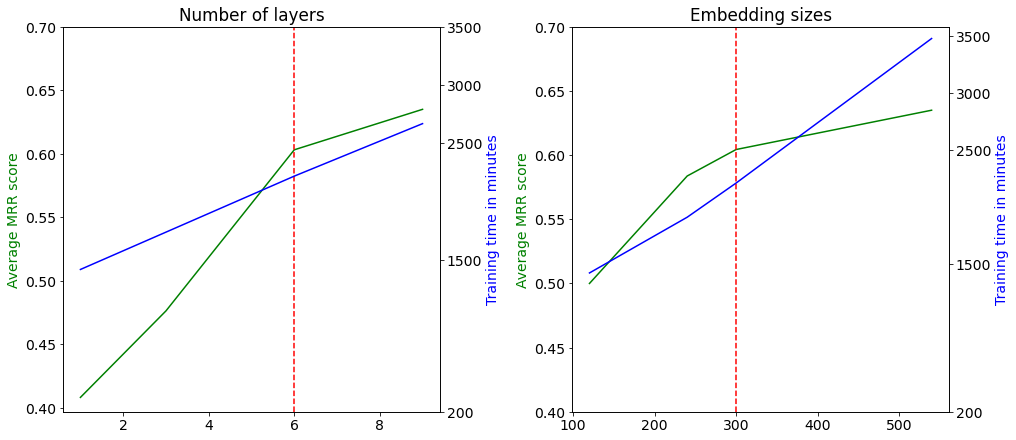

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams
rcParams.update({'font.size': 14})
rcParams["figure.figsize"] = (14,6)

scores = pickle.load(open("rq2/scores.pkl", "rb"))
means = {
    "embedding": [],
    "layer": []
}

for j,o in enumerate(means):
    for i in range(4):
        means[o].append(
            (scores["value_scores"][j]["attr_ids"]["t_score"][i] + 
            scores["value_scores"][j]["attr_ids"]["v_score"][i] + 
            scores["value_scores"][j]["num_ids"]["t_score"][i] + 
            scores["value_scores"][j]["num_ids"]["v_score"][i] + 
            scores["value_scores"][j]["name_ids"]["t_score"][i] + 
            scores["value_scores"][j]["name_ids"]["v_score"][i] + 
            scores["value_scores"][j]["param_ids"]["t_score"][i] + 
            scores["value_scores"][j]["param_ids"]["v_score"][i] + 
            scores["value_scores"][j]["string_ids"]["t_score"][i] + 
            scores["value_scores"][j]["string_ids"]["v_score"][i] + 
            scores["type_scores"][j]["call_ids"]["score"][i] + 
            scores["type_scores"][j]["assign_ids"]["score"][i] + 
            scores["type_scores"][j]["return_ids"]["score"][i] + 
            scores["type_scores"][j]["list_ids"]["score"][i] + 
            scores["type_scores"][j]["dict_ids"]["score"][i] + 
            scores["type_scores"][j]["raise_ids"]["score"][i]
            ) / 16
        )

x = [10, 30, 50, 75]

ticks = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

time_layers = [1420, 1740, 2220, 2670]
time_embeddings = [1420, 1910, 2210, 3480]

fig, (ax11, ax21) = plt.subplots(1, 2, constrained_layout=True)

ax12 = ax11.twinx()
ax22 = ax21.twinx()

ax11.title.set_text("Number of layers")
ax21.title.set_text("Embedding sizes")

ax11.plot([1, 3, 6, 9], means["layer"], "green")
ax12.plot([1, 3, 6, 9], time_layers, "blue")
ax11.axvline(x=6, color="red", linestyle="--")

ax21.plot([120, 240, 300, 540], means["embedding"], "green")
ax22.plot([120, 240, 300, 540], time_embeddings, "blue")
ax21.axvline(x=300, color="red", linestyle="--")

ax11.set_yticks(ticks)
ax21.set_yticks(ticks)

ax12.set_yticks([1500, 200, 2500, 3000, 3500])
ax22.set_yticks([1500, 200, 2500, 3000, 3500])

ax11.set_ylabel("Average MRR score", color="green")
ax12.set_ylabel("Training time in minutes", color="blue")
ax21.set_ylabel("Average MRR score", color="green")
ax22.set_ylabel("Training time in minutes", color="blue")

print(means)

## Evaluation

Models exist, run evaluate script on them